In [1]:
!pip install matplotlib 
!pip install sklearn 
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from typing import List
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
#Включение matprolib для построение графиков
%matplotlib inline 

In [3]:
%%bash 
#bash - командный интерпретатор, который работает в unix системах, например Linux
#команды в командную строку Linux

### Команды в Linux
# rm - команда удаления
# -r - флаг, который удаляет папку и все содержимое в ней
# -f - флаг, чтобы не спрашивать подтверждение каждый раз при удалении фацла или папки
rm -Rf train-images-idx3-ubyte.gz
rm -Rf train-labels-idx1-ubyte.gz

# wget - утилита Unix для скачивания файлов
# -q - флаг, чтоб выводить минимум информации о работе 
wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2020-11-10 06:10:32--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 104.28.7.204, 172.67.171.76, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

     0K .......... .......... .......... .......... ..........  0%  702K 14s
    50K .......... .......... .......... .......... ..........  1% 2.45M 9s
   100K .......... .......... .......... .......... ..........  1% 9.79M 6s
   150K .......... .......... .......... .......... ..........  2% 10.3M 5s
   200K .......... .......... .......... .......... ..........  2% 4.31M 4s
   250K .......... .......... .......... .......... ..........  3% 17.3M 4s
   300K .......... .......... .......... .......... ..........  3% 14.4M 3s
   350K .......... .......... .......... .......... ..........  4% 12.3M 3s
   40

In [4]:
### РАЗБОР ФАЙЛА С МЕТКАМИ 

#С помощью библиотеки gzip открываем файл .gz
with gzip.open('train-labels-idx1-ubyte.gz') as train_labels:
    data_from_train_file = train_labels.read()

# Пропускаем первые 8 байт
label_data = data_from_train_file[8:]
#assert команда проверяет истинность условий. 
#Если 1 - продолжает выполнять программу. 
#Если 0 - выдает ошибку и прекращает выполнение программы.
assert len(label_data) == 60000 

# Конвертируем каждый байт в целое число. 
# Это будет число от 0 до 9
labels = [int(label_byte) for label_byte in label_data]
assert min(labels) == 0 and max(labels) == 9
assert len(labels) == 60000

In [5]:
### РАЗБОР ФАЙЛА С ИЗОБРАЖЕНИЯМИ

SIZE_OF_ONE_IMAGE = 28 ** 2 #Размер изображения 28х28
images = [] #Список для сохранения изображений

# Перебор тренировочного файла и чтение одного изображения за раз
with gzip.open('train-images-idx3-ubyte.gz') as train_images:
    train_images.read(4 * 4)
    
    #ctr = 0
    
    for _ in range(60000):
        image = train_images.read(size=SIZE_OF_ONE_IMAGE)
        assert len(image) == SIZE_OF_ONE_IMAGE
        
        # Конвертировать в NumPy
        image_np = np.frombuffer(image, dtype='uint8') / 255
        images.append(image_np)

images = np.array(images)
images.shape

(60000, 784)

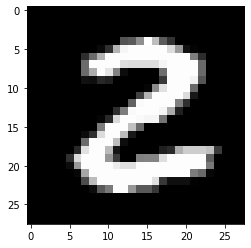

In [6]:
def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape((28, 28)), cmap='gray')
    plt.show()

plot_image(images[25])